In [1]:
%cd ../

/home/zulqarnain/algorithmX/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import matplotlib.pyplot as plt

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import torch

torch.cuda.set_device(0)

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [7]:
SUBJECT_IDs = [4,11,12,9]

In [8]:
new_db = [b for b in affvids_db.all() if 'rest' not in b.task and 'irrelevant' not in b.task and b.subject in SUBJECT_IDs]

In [9]:
subject_list = np.unique([b.subject for b in new_db])
use_db = []

In [10]:
for subject in subject_list:
    print (subject)
    temp_db = [b for b in new_db if b.subject == subject]
    process_fears = ['spider','social','heights']
    for process_fear in process_fears:
        ratings = []
        block_indices = []
        for i in range(len(temp_db)):
            if process_fear in temp_db[i].task:
                block_indices.append(i)
                ratings.append([temp_db[i].individual_differences['fear_rating']])
        ratings = np.array(ratings)
        sorting = np.argsort(ratings[:,0])
        print (np.sort(ratings[:,0]))
        for i in range(len(sorting)):
            if i<=5:
                temp_db[block_indices[sorting[i]]].task = process_fear + '_low'
    #         elif 3<i<=7:
    #             new_db[block_indices[sorting[i]]].task =  process_fear +'_medium'
            else:
                temp_db[block_indices[sorting[i]]].task =  process_fear +'_high'
    use_db.extend(temp_db)

4
[0.    0.286 0.296 0.353 0.483 0.62  0.636 0.683 0.753 0.865 0.945 0.974]
[0.    0.015 0.057 0.148 0.158 0.301 0.332 0.407 0.613 0.62  0.665 0.688]
[0.031 0.051 0.052 0.061 0.095 0.251 0.597 0.644 0.979 0.989 0.999 1.   ]
9
[0.048 0.056 0.07  0.101 0.181 0.225 0.23  0.288 0.405 0.582 0.584 0.6  ]
[0.    0.    0.    0.    0.    0.015 0.064 0.127 0.538 0.6   0.745 0.852]
[0.124 0.168 0.579 0.587 0.633 0.838 0.885 0.914 0.919 0.937 1.    1.   ]
11
[0.059 0.101 0.103 0.104 0.106 0.116 0.142 0.225 0.343 0.366 0.454 0.618]
[0.062 0.07  0.091 0.098 0.098 0.142 0.147 0.15  0.158 0.207 0.247 0.282]
[0.044 0.065 0.085 0.087 0.087 0.114 0.153 0.168 0.179 0.231 0.478 0.491]
12
[0.147 0.236 0.27  0.316 0.327 0.335 0.361 0.363 0.407 0.574 0.579 0.646]
[0.254 0.278 0.311 0.317 0.327 0.337 0.35  0.366 0.382 0.529 0.633 0.656]
[0.194 0.202 0.221 0.298 0.34  0.586 0.766 0.784 0.826 0.859 0.883 0.894]


In [11]:
dtfa = DTFA.DeepTFA(use_db, mask='/home/zulqarnain/fmri_data/AffVids/nifti/wholebrain2.nii.gz', num_factors=300, embedding_dim=2)

12/03/2019 13:16:32 Loading Nifti image /home/zulqarnain/fmri_data/AffVids/nifti/sub-04_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/zulqarnain/fmri_data/AffVids/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/03/2019 13:16:42 Loading Nifti image /home/zulqarnain/fmri_data/AffVids/nifti/sub-04_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/zulqarnain/fmri_data/AffVids/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/03/2019 13:16:53 Loading Nifti image /home/zulqarnain/fmri_data/AffVids/nifti/sub-04_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/zulqarnain/fmri_data/AffVids/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/03/2019 13:17:03 Loading Nifti image /home/zulqarnain/fmri_data/AffVids/nifti/sub-09_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/zulqarnain/fmri_data/AffVids/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/03/20

In [12]:
dtfa.num_blocks

144

In [13]:
dtfa.tasks()

OrderedSet(['heights_high', 'spider_low', 'social_high', 'spider_high', 'heights_low', 'social_low'])

In [14]:
# dtfa.visualize_factor_embedding()

In [15]:
losses = dtfa.train(num_steps=1500, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=500, blocks_batch_size=8, patience=100)

12/03/2019 13:21:03 [Epoch 1] (10792ms) Posterior free-energy 2.62568608e+08 = KL from prior 5.36286000e+05 - log-likelihood -2.62032320e+08
12/03/2019 13:21:03 Saving checkpoint...
12/03/2019 13:21:13 [Epoch 2] (10676ms) Posterior free-energy 2.40456688e+08 = KL from prior 4.54516312e+05 - log-likelihood -2.40002160e+08
12/03/2019 13:21:24 [Epoch 3] (10762ms) Posterior free-energy 2.27018992e+08 = KL from prior 4.38775312e+05 - log-likelihood -2.26580224e+08
12/03/2019 13:21:35 [Epoch 4] (10778ms) Posterior free-energy 2.18363168e+08 = KL from prior 4.19846125e+05 - log-likelihood -2.17943328e+08
12/03/2019 13:21:46 [Epoch 5] (10791ms) Posterior free-energy 2.13244608e+08 = KL from prior 4.05259750e+05 - log-likelihood -2.12839328e+08
12/03/2019 13:21:56 [Epoch 6] (10773ms) Posterior free-energy 2.09318944e+08 = KL from prior 3.98157500e+05 - log-likelihood -2.08920800e+08
12/03/2019 13:22:07 [Epoch 7] (10760ms) Posterior free-energy 2.05918752e+08 = KL from prior 3.86007375e+05 - log

12/03/2019 13:31:23 [Epoch 59] (10643ms) Posterior free-energy 1.76201920e+08 = KL from prior 3.35875250e+05 - log-likelihood -1.75866064e+08
12/03/2019 13:31:33 [Epoch 60] (10621ms) Posterior free-energy 1.75591872e+08 = KL from prior 3.31633969e+05 - log-likelihood -1.75260224e+08
12/03/2019 13:31:44 [Epoch 61] (10631ms) Posterior free-energy 1.75205824e+08 = KL from prior 3.24097000e+05 - log-likelihood -1.74881728e+08
12/03/2019 13:31:54 [Epoch 62] (10643ms) Posterior free-energy 1.74631280e+08 = KL from prior 3.20508500e+05 - log-likelihood -1.74310768e+08
12/03/2019 13:32:05 [Epoch 63] (10623ms) Posterior free-energy 1.74103840e+08 = KL from prior 3.18630219e+05 - log-likelihood -1.73785216e+08
12/03/2019 13:32:16 [Epoch 64] (10676ms) Posterior free-energy 1.73624384e+08 = KL from prior 3.19288375e+05 - log-likelihood -1.73305104e+08
12/03/2019 13:32:26 [Epoch 65] (10647ms) Posterior free-energy 1.73212512e+08 = KL from prior 3.20030125e+05 - log-likelihood -1.72892496e+08
12/03/

12/03/2019 13:41:43 [Epoch 117] (10668ms) Posterior free-energy 1.60393488e+08 = KL from prior 5.45184250e+05 - log-likelihood -1.59848320e+08
12/03/2019 13:41:54 [Epoch 118] (10717ms) Posterior free-energy 1.60254272e+08 = KL from prior 5.49240250e+05 - log-likelihood -1.59705040e+08
12/03/2019 13:42:04 [Epoch 119] (10729ms) Posterior free-energy 1.60155936e+08 = KL from prior 5.53550750e+05 - log-likelihood -1.59602384e+08
12/03/2019 13:42:15 [Epoch 120] (10730ms) Posterior free-energy 1.60024160e+08 = KL from prior 5.58043188e+05 - log-likelihood -1.59466112e+08
12/03/2019 13:42:26 [Epoch 121] (10713ms) Posterior free-energy 1.59903872e+08 = KL from prior 5.62194125e+05 - log-likelihood -1.59341696e+08
12/03/2019 13:42:37 [Epoch 122] (10752ms) Posterior free-energy 1.59767664e+08 = KL from prior 5.65434250e+05 - log-likelihood -1.59202240e+08
12/03/2019 13:42:47 [Epoch 123] (10732ms) Posterior free-energy 1.59664832e+08 = KL from prior 5.68719938e+05 - log-likelihood -1.59096112e+08

12/03/2019 13:52:03 [Epoch 175] (10738ms) Posterior free-energy 1.55735600e+08 = KL from prior 7.27307875e+05 - log-likelihood -1.55008288e+08
12/03/2019 13:52:14 [Epoch 176] (10683ms) Posterior free-energy 1.55686448e+08 = KL from prior 7.30172188e+05 - log-likelihood -1.54956288e+08
12/03/2019 13:52:25 [Epoch 177] (10647ms) Posterior free-energy 1.55618544e+08 = KL from prior 7.31946312e+05 - log-likelihood -1.54886592e+08
12/03/2019 13:52:35 [Epoch 178] (10604ms) Posterior free-energy 1.55570640e+08 = KL from prior 7.34356250e+05 - log-likelihood -1.54836272e+08
12/03/2019 13:52:46 [Epoch 179] (10620ms) Posterior free-energy 1.55526784e+08 = KL from prior 7.36065250e+05 - log-likelihood -1.54790720e+08
12/03/2019 13:52:56 [Epoch 180] (10608ms) Posterior free-energy 1.55477008e+08 = KL from prior 7.39323938e+05 - log-likelihood -1.54737696e+08
12/03/2019 13:53:07 [Epoch 181] (10660ms) Posterior free-energy 1.55446976e+08 = KL from prior 7.42051062e+05 - log-likelihood -1.54704928e+08

12/03/2019 14:02:22 [Epoch 233] (10654ms) Posterior free-energy 1.53596784e+08 = KL from prior 8.37278125e+05 - log-likelihood -1.52759504e+08
12/03/2019 14:02:32 [Epoch 234] (10677ms) Posterior free-energy 1.53567040e+08 = KL from prior 8.40232000e+05 - log-likelihood -1.52726816e+08
12/03/2019 14:02:43 [Epoch 235] (10639ms) Posterior free-energy 1.53544672e+08 = KL from prior 8.41847125e+05 - log-likelihood -1.52702832e+08
12/03/2019 14:02:54 [Epoch 236] (10628ms) Posterior free-energy 1.53504496e+08 = KL from prior 8.43056250e+05 - log-likelihood -1.52661440e+08
12/03/2019 14:03:04 [Epoch 237] (10639ms) Posterior free-energy 1.53486704e+08 = KL from prior 8.44050375e+05 - log-likelihood -1.52642672e+08
12/03/2019 14:03:15 [Epoch 238] (10702ms) Posterior free-energy 1.53478544e+08 = KL from prior 8.45740125e+05 - log-likelihood -1.52632768e+08
12/03/2019 14:03:26 [Epoch 239] (10662ms) Posterior free-energy 1.53456384e+08 = KL from prior 8.47446625e+05 - log-likelihood -1.52608928e+08

12/03/2019 14:12:41 [Epoch 291] (10625ms) Posterior free-energy 1.52402176e+08 = KL from prior 9.20085625e+05 - log-likelihood -1.51482096e+08
12/03/2019 14:12:52 [Epoch 292] (10612ms) Posterior free-energy 1.52425712e+08 = KL from prior 9.20926938e+05 - log-likelihood -1.51504768e+08
12/03/2019 14:13:02 [Epoch 293] (10633ms) Posterior free-energy 1.52387696e+08 = KL from prior 9.22637500e+05 - log-likelihood -1.51465072e+08
12/03/2019 14:13:13 [Epoch 294] (10622ms) Posterior free-energy 1.52374144e+08 = KL from prior 9.24401438e+05 - log-likelihood -1.51449728e+08
12/03/2019 14:13:24 [Epoch 295] (10600ms) Posterior free-energy 1.52371136e+08 = KL from prior 9.25153312e+05 - log-likelihood -1.51445984e+08
12/03/2019 14:13:34 [Epoch 296] (10665ms) Posterior free-energy 1.52348768e+08 = KL from prior 9.27018500e+05 - log-likelihood -1.51421728e+08
12/03/2019 14:13:45 [Epoch 297] (10620ms) Posterior free-energy 1.52339552e+08 = KL from prior 9.27543125e+05 - log-likelihood -1.51412000e+08

12/03/2019 14:23:00 [Epoch 349] (10664ms) Posterior free-energy 1.51699200e+08 = KL from prior 9.86704250e+05 - log-likelihood -1.50712496e+08
12/03/2019 14:23:11 [Epoch 350] (10677ms) Posterior free-energy 1.51672272e+08 = KL from prior 9.87600375e+05 - log-likelihood -1.50684688e+08
12/03/2019 14:23:22 [Epoch 351] (10626ms) Posterior free-energy 1.51673760e+08 = KL from prior 9.89265875e+05 - log-likelihood -1.50684496e+08
12/03/2019 14:23:32 [Epoch 352] (10641ms) Posterior free-energy 1.51663776e+08 = KL from prior 9.89029375e+05 - log-likelihood -1.50674736e+08
12/03/2019 14:23:43 [Epoch 353] (10647ms) Posterior free-energy 1.51646400e+08 = KL from prior 9.90423250e+05 - log-likelihood -1.50655968e+08
12/03/2019 14:23:53 [Epoch 354] (10660ms) Posterior free-energy 1.51646960e+08 = KL from prior 9.91054625e+05 - log-likelihood -1.50655920e+08
12/03/2019 14:24:04 [Epoch 355] (10633ms) Posterior free-energy 1.51621584e+08 = KL from prior 9.92712750e+05 - log-likelihood -1.50628864e+08

12/03/2019 14:33:21 [Epoch 407] (10627ms) Posterior free-energy 1.51198176e+08 = KL from prior 1.04183612e+06 - log-likelihood -1.50156352e+08
12/03/2019 14:33:31 [Epoch 408] (10634ms) Posterior free-energy 1.51183824e+08 = KL from prior 1.04372425e+06 - log-likelihood -1.50140112e+08
12/03/2019 14:33:42 [Epoch 409] (10631ms) Posterior free-energy 1.51206864e+08 = KL from prior 1.04332656e+06 - log-likelihood -1.50163552e+08
12/03/2019 14:33:53 [Epoch 410] (10661ms) Posterior free-energy 1.51177648e+08 = KL from prior 1.04483438e+06 - log-likelihood -1.50132800e+08
12/03/2019 14:34:03 [Epoch 411] (10589ms) Posterior free-energy 1.51200096e+08 = KL from prior 1.04608388e+06 - log-likelihood -1.50154016e+08
12/03/2019 14:34:14 [Epoch 412] (10651ms) Posterior free-energy 1.51156992e+08 = KL from prior 1.04715900e+06 - log-likelihood -1.50109840e+08
12/03/2019 14:34:24 [Epoch 413] (10633ms) Posterior free-energy 1.51157792e+08 = KL from prior 1.04686550e+06 - log-likelihood -1.50110912e+08

12/03/2019 14:43:40 [Epoch 465] (10745ms) Posterior free-energy 1.50867808e+08 = KL from prior 1.09022425e+06 - log-likelihood -1.49777600e+08
12/03/2019 14:43:51 [Epoch 466] (10630ms) Posterior free-energy 1.50874688e+08 = KL from prior 1.09117912e+06 - log-likelihood -1.49783520e+08
12/03/2019 14:44:02 [Epoch 467] (10731ms) Posterior free-energy 1.50857888e+08 = KL from prior 1.09168812e+06 - log-likelihood -1.49766240e+08
12/03/2019 14:44:12 [Epoch 468] (10661ms) Posterior free-energy 1.50858240e+08 = KL from prior 1.09348875e+06 - log-likelihood -1.49764768e+08
12/03/2019 14:44:23 [Epoch 469] (10671ms) Posterior free-energy 1.50870464e+08 = KL from prior 1.09386988e+06 - log-likelihood -1.49776592e+08
12/03/2019 14:44:34 [Epoch 470] (10611ms) Posterior free-energy 1.50867232e+08 = KL from prior 1.09476525e+06 - log-likelihood -1.49772448e+08
12/03/2019 14:44:44 [Epoch 471] (10649ms) Posterior free-energy 1.50860464e+08 = KL from prior 1.09416000e+06 - log-likelihood -1.49766304e+08

12/03/2019 14:53:59 [Epoch 523] (10648ms) Posterior free-energy 1.50747456e+08 = KL from prior 1.13131662e+06 - log-likelihood -1.49616144e+08
12/03/2019 14:54:10 [Epoch 524] (10605ms) Posterior free-energy 1.50720064e+08 = KL from prior 1.13187475e+06 - log-likelihood -1.49588192e+08
12/03/2019 14:54:20 [Epoch 525] (10610ms) Posterior free-energy 1.50718592e+08 = KL from prior 1.13245025e+06 - log-likelihood -1.49586144e+08
12/03/2019 14:54:31 [Epoch 526] (10617ms) Posterior free-energy 1.50710768e+08 = KL from prior 1.13357112e+06 - log-likelihood -1.49577200e+08
12/03/2019 14:54:42 [Epoch 527] (10643ms) Posterior free-energy 1.50687696e+08 = KL from prior 1.13392112e+06 - log-likelihood -1.49553760e+08
12/03/2019 14:54:52 [Epoch 528] (10657ms) Posterior free-energy 1.50726368e+08 = KL from prior 1.13480125e+06 - log-likelihood -1.49591552e+08
12/03/2019 14:55:03 [Epoch 529] (10640ms) Posterior free-energy 1.50708512e+08 = KL from prior 1.13533288e+06 - log-likelihood -1.49573168e+08

12/03/2019 15:04:18 [Epoch 581] (10721ms) Posterior free-energy 1.50561632e+08 = KL from prior 1.16639225e+06 - log-likelihood -1.49395248e+08
12/03/2019 15:04:28 [Epoch 582] (10705ms) Posterior free-energy 1.50538592e+08 = KL from prior 1.16686650e+06 - log-likelihood -1.49371712e+08
12/03/2019 15:04:39 [Epoch 583] (10683ms) Posterior free-energy 1.50553888e+08 = KL from prior 1.16724350e+06 - log-likelihood -1.49386624e+08
12/03/2019 15:04:50 [Epoch 584] (10758ms) Posterior free-energy 1.50555456e+08 = KL from prior 1.16817250e+06 - log-likelihood -1.49387280e+08
12/03/2019 15:05:00 [Epoch 585] (10744ms) Posterior free-energy 1.50557696e+08 = KL from prior 1.16830338e+06 - log-likelihood -1.49389392e+08
12/03/2019 15:05:11 [Epoch 586] (10675ms) Posterior free-energy 1.50526768e+08 = KL from prior 1.16917225e+06 - log-likelihood -1.49357600e+08
12/03/2019 15:05:22 [Epoch 587] (10633ms) Posterior free-energy 1.50503344e+08 = KL from prior 1.16991000e+06 - log-likelihood -1.49333456e+08

12/03/2019 15:14:37 [Epoch 639] (10665ms) Posterior free-energy 1.50443808e+08 = KL from prior 1.19619262e+06 - log-likelihood -1.49247616e+08
12/03/2019 15:14:48 [Epoch 640] (10662ms) Posterior free-energy 1.50451504e+08 = KL from prior 1.19613650e+06 - log-likelihood -1.49255360e+08
12/03/2019 15:14:58 [Epoch 641] (10631ms) Posterior free-energy 1.50406736e+08 = KL from prior 1.19689912e+06 - log-likelihood -1.49209840e+08
12/03/2019 15:15:09 [Epoch 642] (10647ms) Posterior free-energy 1.50417216e+08 = KL from prior 1.19665000e+06 - log-likelihood -1.49220576e+08
12/03/2019 15:15:20 [Epoch 643] (10632ms) Posterior free-energy 1.50426912e+08 = KL from prior 1.19719525e+06 - log-likelihood -1.49229712e+08
12/03/2019 15:15:30 [Epoch 644] (10682ms) Posterior free-energy 1.50402240e+08 = KL from prior 1.19831675e+06 - log-likelihood -1.49203904e+08
12/03/2019 15:15:41 [Epoch 645] (10650ms) Posterior free-energy 1.50374672e+08 = KL from prior 1.19823575e+06 - log-likelihood -1.49176432e+08

12/03/2019 15:24:57 [Epoch 697] (10769ms) Posterior free-energy 1.50221104e+08 = KL from prior 1.22040100e+06 - log-likelihood -1.49000704e+08
12/03/2019 15:25:08 [Epoch 698] (10748ms) Posterior free-energy 1.50259744e+08 = KL from prior 1.21974125e+06 - log-likelihood -1.49040032e+08
12/03/2019 15:25:18 [Epoch 699] (10746ms) Posterior free-energy 1.50229440e+08 = KL from prior 1.22084600e+06 - log-likelihood -1.49008576e+08
12/03/2019 15:25:29 [Epoch 700] (10738ms) Posterior free-energy 1.50267216e+08 = KL from prior 1.22131350e+06 - log-likelihood -1.49045904e+08
12/03/2019 15:25:40 [Epoch 701] (10748ms) Posterior free-energy 1.50249488e+08 = KL from prior 1.22097512e+06 - log-likelihood -1.49028512e+08
12/03/2019 15:25:51 [Epoch 702] (10743ms) Posterior free-energy 1.50284384e+08 = KL from prior 1.22153588e+06 - log-likelihood -1.49062848e+08
12/03/2019 15:26:01 [Epoch 703] (10749ms) Posterior free-energy 1.50321728e+08 = KL from prior 1.22182075e+06 - log-likelihood -1.49099904e+08

12/03/2019 15:35:17 [Epoch 755] (10663ms) Posterior free-energy 1.50256656e+08 = KL from prior 1.24066012e+06 - log-likelihood -1.49016000e+08
12/03/2019 15:35:27 [Epoch 756] (10662ms) Posterior free-energy 1.50191168e+08 = KL from prior 1.24100462e+06 - log-likelihood -1.48950144e+08
12/03/2019 15:35:38 [Epoch 757] (10642ms) Posterior free-energy 1.50260432e+08 = KL from prior 1.24174362e+06 - log-likelihood -1.49018672e+08
12/03/2019 15:35:49 [Epoch 758] (10655ms) Posterior free-energy 1.50259824e+08 = KL from prior 1.24124100e+06 - log-likelihood -1.49018592e+08
12/03/2019 15:35:59 [Epoch 759] (10673ms) Posterior free-energy 1.50234048e+08 = KL from prior 1.24172525e+06 - log-likelihood -1.48992304e+08
12/03/2019 15:36:10 [Epoch 760] (10686ms) Posterior free-energy 1.50248976e+08 = KL from prior 1.24224638e+06 - log-likelihood -1.49006736e+08
12/03/2019 15:36:21 [Epoch 761] (10691ms) Posterior free-energy 1.50189024e+08 = KL from prior 1.24343938e+06 - log-likelihood -1.48945600e+08

12/03/2019 15:45:35 [Epoch 813] (10772ms) Posterior free-energy 1.50182592e+08 = KL from prior 1.25873900e+06 - log-likelihood -1.48923856e+08
12/03/2019 15:45:46 [Epoch 814] (10742ms) Posterior free-energy 1.50167360e+08 = KL from prior 1.25905212e+06 - log-likelihood -1.48908304e+08
12/03/2019 15:45:56 [Epoch 815] (10707ms) Posterior free-energy 1.50161328e+08 = KL from prior 1.25923912e+06 - log-likelihood -1.48902096e+08
12/03/2019 15:46:07 [Epoch 816] (10689ms) Posterior free-energy 1.50139600e+08 = KL from prior 1.25956550e+06 - log-likelihood -1.48880032e+08
12/03/2019 15:46:18 [Epoch 817] (10700ms) Posterior free-energy 1.50230320e+08 = KL from prior 1.26036112e+06 - log-likelihood -1.48969936e+08
12/03/2019 15:46:29 [Epoch 818] (10680ms) Posterior free-energy 1.50150848e+08 = KL from prior 1.26039525e+06 - log-likelihood -1.48890448e+08
12/03/2019 15:46:39 [Epoch 819] (10696ms) Posterior free-energy 1.50189536e+08 = KL from prior 1.25966800e+06 - log-likelihood -1.48929888e+08

12/03/2019 15:55:55 [Epoch 871] (10697ms) Posterior free-energy 1.50038960e+08 = KL from prior 1.27441112e+06 - log-likelihood -1.48764544e+08
12/03/2019 15:56:06 [Epoch 872] (10687ms) Posterior free-energy 1.50126528e+08 = KL from prior 1.27426650e+06 - log-likelihood -1.48852256e+08
12/03/2019 15:56:16 [Epoch 873] (10653ms) Posterior free-energy 1.50007712e+08 = KL from prior 1.27485075e+06 - log-likelihood -1.48732864e+08
12/03/2019 15:56:27 [Epoch 874] (10675ms) Posterior free-energy 1.50087360e+08 = KL from prior 1.27477200e+06 - log-likelihood -1.48812576e+08
12/03/2019 15:56:38 [Epoch 875] (10707ms) Posterior free-energy 1.50017280e+08 = KL from prior 1.27518675e+06 - log-likelihood -1.48742080e+08
12/03/2019 15:56:48 [Epoch 876] (10742ms) Posterior free-energy 1.50046240e+08 = KL from prior 1.27557888e+06 - log-likelihood -1.48770656e+08
12/03/2019 15:56:59 [Epoch 877] (10743ms) Posterior free-energy 1.50073984e+08 = KL from prior 1.27522900e+06 - log-likelihood -1.48798752e+08

12/03/2019 16:06:18 [Epoch 929] (10674ms) Posterior free-energy 1.50116720e+08 = KL from prior 1.28796762e+06 - log-likelihood -1.48828736e+08
12/03/2019 16:06:28 [Epoch 930] (10685ms) Posterior free-energy 1.50020080e+08 = KL from prior 1.28850762e+06 - log-likelihood -1.48731552e+08
12/03/2019 16:06:39 [Epoch 931] (10623ms) Posterior free-energy 1.50124368e+08 = KL from prior 1.28842825e+06 - log-likelihood -1.48835920e+08
12/03/2019 16:06:50 [Epoch 932] (10624ms) Posterior free-energy 1.50062976e+08 = KL from prior 1.28818275e+06 - log-likelihood -1.48774816e+08
12/03/2019 16:07:00 [Epoch 933] (10647ms) Posterior free-energy 1.50085024e+08 = KL from prior 1.28908900e+06 - log-likelihood -1.48795936e+08
12/03/2019 16:07:11 [Epoch 934] (10638ms) Posterior free-energy 1.50069248e+08 = KL from prior 1.28865338e+06 - log-likelihood -1.48780592e+08
12/03/2019 16:07:22 [Epoch 935] (10653ms) Posterior free-energy 1.50044464e+08 = KL from prior 1.28967662e+06 - log-likelihood -1.48754784e+08

12/03/2019 16:16:36 [Epoch 987] (10635ms) Posterior free-energy 1.49979232e+08 = KL from prior 1.29902862e+06 - log-likelihood -1.48680192e+08
12/03/2019 16:16:47 [Epoch 988] (10595ms) Posterior free-energy 1.50037584e+08 = KL from prior 1.30024725e+06 - log-likelihood -1.48737344e+08
12/03/2019 16:16:57 [Epoch 989] (10612ms) Posterior free-energy 1.49989072e+08 = KL from prior 1.30027275e+06 - log-likelihood -1.48688816e+08
12/03/2019 16:17:08 [Epoch 990] (10620ms) Posterior free-energy 1.50024544e+08 = KL from prior 1.30113550e+06 - log-likelihood -1.48723392e+08
12/03/2019 16:17:19 [Epoch 991] (10672ms) Posterior free-energy 1.50082464e+08 = KL from prior 1.30058962e+06 - log-likelihood -1.48781872e+08
12/03/2019 16:17:29 [Epoch 992] (10635ms) Posterior free-energy 1.49989408e+08 = KL from prior 1.30062150e+06 - log-likelihood -1.48688800e+08
12/03/2019 16:17:40 [Epoch 993] (10653ms) Posterior free-energy 1.50046448e+08 = KL from prior 1.30103200e+06 - log-likelihood -1.48745408e+08

12/03/2019 16:26:47 [Epoch 1044] (10731ms) Posterior free-energy 1.50035952e+08 = KL from prior 1.31087862e+06 - log-likelihood -1.48725072e+08
12/03/2019 16:26:57 [Epoch 1045] (10748ms) Posterior free-energy 1.50121104e+08 = KL from prior 1.31016212e+06 - log-likelihood -1.48810944e+08
12/03/2019 16:27:08 [Epoch 1046] (10746ms) Posterior free-energy 1.50103504e+08 = KL from prior 1.31032838e+06 - log-likelihood -1.48793184e+08
12/03/2019 16:27:19 [Epoch 1047] (10693ms) Posterior free-energy 1.50090192e+08 = KL from prior 1.31070100e+06 - log-likelihood -1.48779488e+08
12/03/2019 16:27:29 [Epoch 1048] (10687ms) Posterior free-energy 1.50055408e+08 = KL from prior 1.31172400e+06 - log-likelihood -1.48743680e+08
12/03/2019 16:27:40 [Epoch 1049] (10721ms) Posterior free-energy 1.50012336e+08 = KL from prior 1.31120462e+06 - log-likelihood -1.48701136e+08
12/03/2019 16:27:51 [Epoch 1050] (10717ms) Posterior free-energy 1.50135216e+08 = KL from prior 1.31173262e+06 - log-likelihood -1.48823

12/03/2019 16:36:55 [Epoch 1101] (10722ms) Posterior free-energy 1.49894640e+08 = KL from prior 1.31893612e+06 - log-likelihood -1.48575680e+08
12/03/2019 16:37:05 [Epoch 1102] (10691ms) Posterior free-energy 1.49945856e+08 = KL from prior 1.31983625e+06 - log-likelihood -1.48626032e+08
12/03/2019 16:37:16 [Epoch 1103] (10690ms) Posterior free-energy 1.49886336e+08 = KL from prior 1.31985562e+06 - log-likelihood -1.48566496e+08
12/03/2019 16:37:27 [Epoch 1104] (10688ms) Posterior free-energy 1.49921024e+08 = KL from prior 1.32046088e+06 - log-likelihood -1.48600576e+08
12/03/2019 16:37:37 [Epoch 1105] (10693ms) Posterior free-energy 1.50006688e+08 = KL from prior 1.31975775e+06 - log-likelihood -1.48686912e+08
12/03/2019 16:37:48 [Epoch 1106] (10686ms) Posterior free-energy 1.49876016e+08 = KL from prior 1.31939400e+06 - log-likelihood -1.48556624e+08
12/03/2019 16:37:59 [Epoch 1107] (10684ms) Posterior free-energy 1.49965760e+08 = KL from prior 1.32044850e+06 - log-likelihood -1.48645

12/03/2019 16:47:07 [Epoch 1158] (10778ms) Posterior free-energy 1.49875040e+08 = KL from prior 1.32811875e+06 - log-likelihood -1.48546928e+08
12/03/2019 16:47:18 [Epoch 1159] (10780ms) Posterior free-energy 1.49912208e+08 = KL from prior 1.32830288e+06 - log-likelihood -1.48583904e+08
12/03/2019 16:47:28 [Epoch 1160] (10829ms) Posterior free-energy 1.49913808e+08 = KL from prior 1.32707125e+06 - log-likelihood -1.48586736e+08
12/03/2019 16:47:39 [Epoch 1161] (10798ms) Posterior free-energy 1.49885952e+08 = KL from prior 1.32763975e+06 - log-likelihood -1.48558304e+08
12/03/2019 16:47:50 [Epoch 1162] (10811ms) Posterior free-energy 1.49929392e+08 = KL from prior 1.32831775e+06 - log-likelihood -1.48601088e+08
12/03/2019 16:48:01 [Epoch 1163] (10788ms) Posterior free-energy 1.49834992e+08 = KL from prior 1.32844000e+06 - log-likelihood -1.48506544e+08
12/03/2019 16:48:12 [Epoch 1164] (10790ms) Posterior free-energy 1.49977600e+08 = KL from prior 1.32826200e+06 - log-likelihood -1.48649

12/03/2019 16:57:15 [Epoch 1215] (10775ms) Posterior free-energy 1.49920832e+08 = KL from prior 1.33361900e+06 - log-likelihood -1.48587216e+08
12/03/2019 16:57:26 [Epoch 1216] (10703ms) Posterior free-energy 1.49991504e+08 = KL from prior 1.33449438e+06 - log-likelihood -1.48657024e+08
12/03/2019 16:57:37 [Epoch 1217] (10642ms) Posterior free-energy 1.49933376e+08 = KL from prior 1.33468450e+06 - log-likelihood -1.48598688e+08
12/03/2019 16:57:47 [Epoch 1218] (10657ms) Posterior free-energy 1.49908160e+08 = KL from prior 1.33491338e+06 - log-likelihood -1.48573264e+08
12/03/2019 16:57:58 [Epoch 1219] (10676ms) Posterior free-energy 1.50009264e+08 = KL from prior 1.33578825e+06 - log-likelihood -1.48673488e+08
12/03/2019 16:58:09 [Epoch 1220] (10638ms) Posterior free-energy 1.49875536e+08 = KL from prior 1.33449725e+06 - log-likelihood -1.48541024e+08
12/03/2019 16:58:19 [Epoch 1221] (10654ms) Posterior free-energy 1.49947552e+08 = KL from prior 1.33540050e+06 - log-likelihood -1.48612

12/03/2019 17:07:22 [Epoch 1272] (10634ms) Posterior free-energy 1.49808496e+08 = KL from prior 1.34129525e+06 - log-likelihood -1.48467200e+08
12/03/2019 17:07:33 [Epoch 1273] (10661ms) Posterior free-energy 1.49867168e+08 = KL from prior 1.34151512e+06 - log-likelihood -1.48525664e+08
12/03/2019 17:07:44 [Epoch 1274] (10744ms) Posterior free-energy 1.49870496e+08 = KL from prior 1.34137525e+06 - log-likelihood -1.48529120e+08
12/03/2019 17:07:55 [Epoch 1275] (10687ms) Posterior free-energy 1.49833664e+08 = KL from prior 1.34134475e+06 - log-likelihood -1.48492304e+08
12/03/2019 17:08:05 [Epoch 1276] (10675ms) Posterior free-energy 1.49853680e+08 = KL from prior 1.34233838e+06 - log-likelihood -1.48511344e+08
12/03/2019 17:08:16 [Epoch 1277] (10678ms) Posterior free-energy 1.49821168e+08 = KL from prior 1.34221300e+06 - log-likelihood -1.48478960e+08
12/03/2019 17:08:27 [Epoch 1278] (10647ms) Posterior free-energy 1.49940736e+08 = KL from prior 1.34189925e+06 - log-likelihood -1.48598

12/03/2019 17:17:31 [Epoch 1329] (10659ms) Posterior free-energy 1.49810960e+08 = KL from prior 1.34637225e+06 - log-likelihood -1.48464592e+08
12/03/2019 17:17:42 [Epoch 1330] (10662ms) Posterior free-energy 1.49893088e+08 = KL from prior 1.34683488e+06 - log-likelihood -1.48546256e+08
12/03/2019 17:17:52 [Epoch 1331] (10599ms) Posterior free-energy 1.49831072e+08 = KL from prior 1.34801400e+06 - log-likelihood -1.48483056e+08
12/03/2019 17:18:03 [Epoch 1332] (10668ms) Posterior free-energy 1.49841440e+08 = KL from prior 1.34745762e+06 - log-likelihood -1.48493984e+08
12/03/2019 17:18:14 [Epoch 1333] (10678ms) Posterior free-energy 1.49935152e+08 = KL from prior 1.34759312e+06 - log-likelihood -1.48587568e+08
12/03/2019 17:18:24 [Epoch 1334] (10695ms) Posterior free-energy 1.49815040e+08 = KL from prior 1.34715775e+06 - log-likelihood -1.48467904e+08
12/03/2019 17:18:35 [Epoch 1335] (10592ms) Posterior free-energy 1.49896656e+08 = KL from prior 1.34828012e+06 - log-likelihood -1.48548

Epoch  1370: reducing learning rate of group 0 to 5.0000e-03.
Epoch  1370: reducing learning rate of group 1 to 5.0000e-05.
Epoch  1370: reducing learning rate of group 2 to 5.0000e-03.
Epoch  1370: reducing learning rate of group 3 to 5.0000e-05.


12/03/2019 17:25:10 [Epoch 1372] (10599ms) Posterior free-energy 1.49746256e+08 = KL from prior 1.34972475e+06 - log-likelihood -1.48396528e+08
12/03/2019 17:25:21 [Epoch 1373] (10694ms) Posterior free-energy 1.49514080e+08 = KL from prior 1.34821400e+06 - log-likelihood -1.48165872e+08
12/03/2019 17:25:31 [Epoch 1374] (10600ms) Posterior free-energy 1.49381088e+08 = KL from prior 1.34882825e+06 - log-likelihood -1.48032256e+08
12/03/2019 17:25:42 [Epoch 1375] (10662ms) Posterior free-energy 1.49368544e+08 = KL from prior 1.34782025e+06 - log-likelihood -1.48020736e+08
12/03/2019 17:25:52 [Epoch 1376] (10622ms) Posterior free-energy 1.49359648e+08 = KL from prior 1.34759475e+06 - log-likelihood -1.48012064e+08
12/03/2019 17:26:03 [Epoch 1377] (10616ms) Posterior free-energy 1.49352800e+08 = KL from prior 1.34770400e+06 - log-likelihood -1.48005088e+08
12/03/2019 17:26:14 [Epoch 1378] (10651ms) Posterior free-energy 1.49348672e+08 = KL from prior 1.34823888e+06 - log-likelihood -1.48000

12/03/2019 17:35:20 [Epoch 1429] (10766ms) Posterior free-energy 1.49285312e+08 = KL from prior 1.34670188e+06 - log-likelihood -1.47938608e+08
12/03/2019 17:35:31 [Epoch 1430] (10777ms) Posterior free-energy 1.49284128e+08 = KL from prior 1.34627700e+06 - log-likelihood -1.47937856e+08
12/03/2019 17:35:42 [Epoch 1431] (10790ms) Posterior free-energy 1.49282240e+08 = KL from prior 1.34670388e+06 - log-likelihood -1.47935520e+08
12/03/2019 17:35:52 [Epoch 1432] (10755ms) Posterior free-energy 1.49283920e+08 = KL from prior 1.34654150e+06 - log-likelihood -1.47937344e+08
12/03/2019 17:36:03 [Epoch 1433] (10840ms) Posterior free-energy 1.49283232e+08 = KL from prior 1.34674688e+06 - log-likelihood -1.47936480e+08
12/03/2019 17:36:14 [Epoch 1434] (10841ms) Posterior free-energy 1.49282752e+08 = KL from prior 1.34646900e+06 - log-likelihood -1.47936288e+08
12/03/2019 17:36:25 [Epoch 1435] (10747ms) Posterior free-energy 1.49282048e+08 = KL from prior 1.34686700e+06 - log-likelihood -1.47935

12/03/2019 17:45:32 [Epoch 1486] (10603ms) Posterior free-energy 1.49254720e+08 = KL from prior 1.34969438e+06 - log-likelihood -1.47905024e+08
12/03/2019 17:45:42 [Epoch 1487] (10704ms) Posterior free-energy 1.49254240e+08 = KL from prior 1.34916375e+06 - log-likelihood -1.47905072e+08
12/03/2019 17:45:53 [Epoch 1488] (10716ms) Posterior free-energy 1.49248704e+08 = KL from prior 1.34888988e+06 - log-likelihood -1.47899824e+08
12/03/2019 17:46:04 [Epoch 1489] (10660ms) Posterior free-energy 1.49250672e+08 = KL from prior 1.34868525e+06 - log-likelihood -1.47902000e+08
12/03/2019 17:46:14 [Epoch 1490] (10635ms) Posterior free-energy 1.49250752e+08 = KL from prior 1.34932450e+06 - log-likelihood -1.47901408e+08
12/03/2019 17:46:25 [Epoch 1491] (10699ms) Posterior free-energy 1.49251088e+08 = KL from prior 1.34980538e+06 - log-likelihood -1.47901296e+08
12/03/2019 17:46:36 [Epoch 1492] (10725ms) Posterior free-energy 1.49249664e+08 = KL from prior 1.34933450e+06 - log-likelihood -1.47900

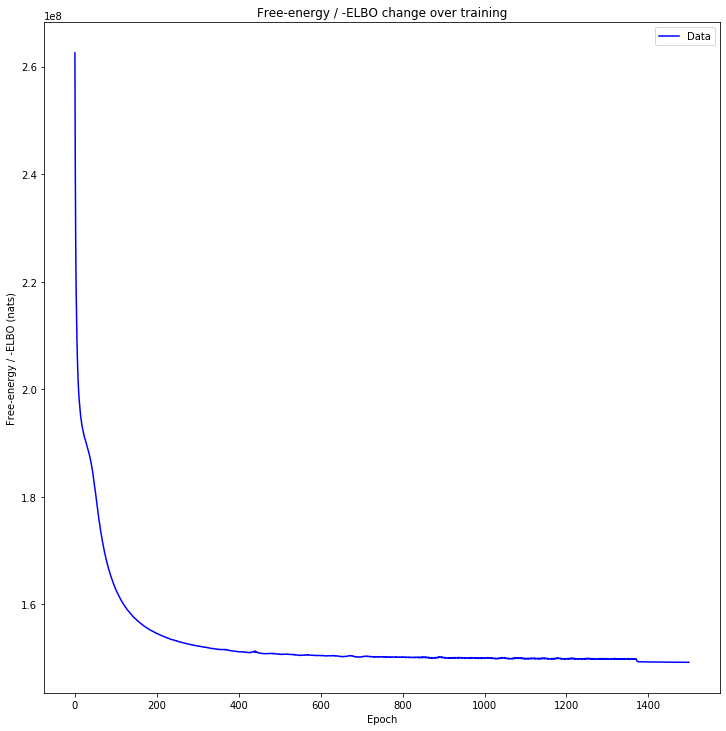

In [16]:
utils.plot_losses(losses)

In [17]:
def task_labeler(task):
    if task == 'heights_high':
        return 'h_h'
    elif task == 'heights_low':
        return 'h_l'
    elif task == 'social_high':
        return 'so_h'
    elif task == 'social_low':
        return 'so_l'
    elif task == 'spider_high':
        return 'sp_h'
    elif task == 'spider_low':
        return 'sp_l'
    else:
        return 'Other'


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [18]:
def subject_labeler(subject):
    return str(subject)

In [19]:
def scatter_interactions_embedding(self, labeler=None, filename='', show=True,
                                   xlims=None, ylims=None, figsize=utils.FIGSIZE,
                                   colormap='Accent', serialize_data=True,
                                   plot_ellipse=True, legend_ordering=None,nstd=3):
    import itertools
    from torch.nn.functional import softplus
    import matplotlib.patches as mpatches
    from ordered_set import OrderedSet
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]
    
    if filename == '':
        filename = self.common_name() + '_task_embedding.pdf'
    hyperparams = self.variational.hyperparams.state_vardict()
    z_ps_mu = hyperparams['interactions']['mu'].data.numpy()
    z_ps_sigma = softplus(hyperparams['interactions']['sigma'].data).numpy()
    tasks = self.tasks()
    subjects = self.subjects()
    interactions = OrderedSet(list(itertools.product(subjects, tasks)))
    embedding_name = 'z^{PS}'
    minus_lims = np.min(z_ps_mu - z_ps_sigma * 2, axis=0).tolist()
    plus_lims = np.max(z_ps_mu + z_ps_sigma * 2, axis=0).tolist()
    if not xlims:
        xlims = (minus_lims[0], plus_lims[0])
    if not ylims:
        ylims = (minus_lims[1], plus_lims[1])

    fig, ax = plt.subplots(facecolor='white', figsize=figsize, frameon=True)
    ax.set_xlabel('$%s_1$' % embedding_name)
    if xlims is not None:
        ax.set_xlim(xlims)
    ax.set_ylabel('$%s_2$' % embedding_name)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_title('Interactions Embeddings')
    task_colors = ['pink','red','lightgreen','darkgreen','lightblue','darkblue'] #spider(ltoh),social(ltoh),heights(ltoh)
    task_colors = ['red','darkgreen','darkblue']
    for i in range(len(z_ps_mu)):
        if interactions[i][1] == 'spider_low':
            edgecolor = task_colors[0]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],edgecolors=task_colors[0],facecolors='none',marker='o')
        elif interactions[i][1] == 'spider_high':
            edgecolor = task_colors[0]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[0],marker='o')
        elif interactions[i][1] == 'social_low':
            edgecolor = task_colors[1]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],edgecolors=task_colors[1],facecolors='none',marker='o')
        elif interactions[i][1] == 'social_high':
            edgecolor = task_colors[1]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[1],marker='o')
        elif interactions[i][1] == 'heights_low':
            edgecolor = task_colors[2]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],edgecolors=task_colors[2],facecolors='none',marker='o')
        elif interactions[i][1] == 'heights_high':
            edgecolor = task_colors[2]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[2],marker='o')
        if plot_ellipse:
            cov = np.eye(2) * z_ps_sigma[i,:] ** 2
            vals, vecs = eigsorted(cov)
            theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
            width, height = 2 * nstd * np.sqrt(vals)
            ellip = mpatches.Ellipse(xy=z_ps_mu[i,:], width=width, height=height, 
                                     angle=theta,color=edgecolor,alpha=0.2)
            ax.add_artist(ellip)
        ax.annotate(str(interactions[i][0]),(z_ps_mu[i,0],z_ps_mu[i,1]))

    ordered_tasks = ['spider', 'social', 'heights']
    single_task_colors = task_colors
    manual_legend = [mpatches.Patch(color=c,label=t) for (c,t) in zip(single_task_colors,ordered_tasks)]
    for subject in subjects:
        for (t,c) in zip(ordered_tasks,single_task_colors):
            for (loc,inters) in enumerate(interactions):
                if inters[1] == t+'_low' and inters[0] == subject:
                    t_low = loc
                elif inters[1] == t+'_high' and inters[0] == subject:
                    t_high = loc
            # t_low = [i for i in range(len(interactions)) if interactions[i][1] == t+'_low' and interactions[i][0] == subject][0]
            # t_high = [i for i in range(len(interactions)) if interactions[i][1] == t+'_high' and interactions[i][0] == subject][0]
            ax.plot([z_ps_mu[t_low][0],z_ps_mu[t_high][0]],[z_ps_mu[t_low][1],z_ps_mu[t_high][1]],color=c)
            # ax.arrow(x=z_ps_mu[t_low][0],y=z_ps_mu[t_low][1],
            #          dx=(z_ps_mu[t_high][0]-z_ps_mu[t_low][0])/2,
            #          dy =(z_ps_mu[t_high][1]-z_ps_mu[t_low][1])/2,color='green',length_includes_head=True)
    plt.legend(handles=manual_legend)
    if filename is not None:
        fig.savefig(filename)
    if show:
        fig.show()


/home/zulqarnain/algorithmX/htfatorch/htfa_torch/utils.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


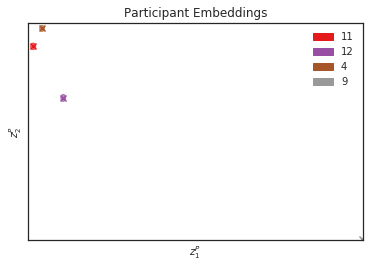

In [20]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_' + str(SUBJECT_IDs) + '_norest_subject_embedding.pdf')

/home/zulqarnain/algorithmX/htfatorch/htfa_torch/utils.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


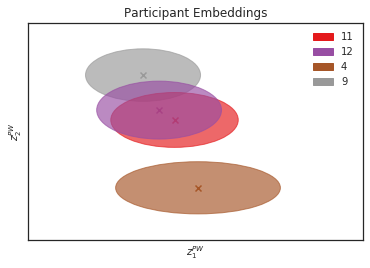

In [21]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_' + str(SUBJECT_IDs) + '_norest_subject_weight_embedding.pdf')

/home/zulqarnain/algorithmX/htfatorch/htfa_torch/utils.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


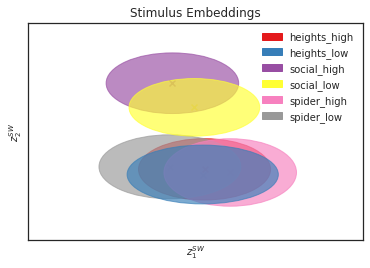

In [22]:
dtfa.scatter_task_weight_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_' + str(SUBJECT_IDs) + '_norest_subject_task_weight_embedding.pdf')

In [23]:
def interactions_labeler(subject,task):
    
    return task_labeler(task) + subject_labeler(subject)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


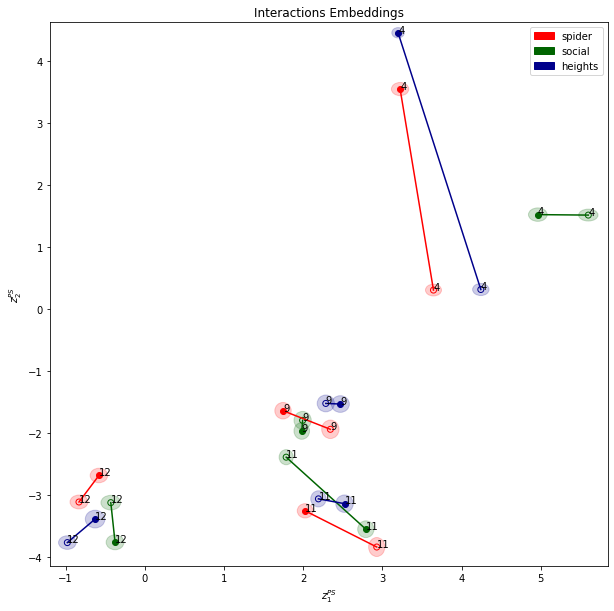

In [24]:
scatter_interactions_embedding(dtfa,labeler=interactions_labeler,filename='subject_' + str(SUBJECT_IDs) + '_norest_interaction_embedding.pdf',
                               plot_ellipse=True,colormap='tab20',figsize=(10,10),nstd=1)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


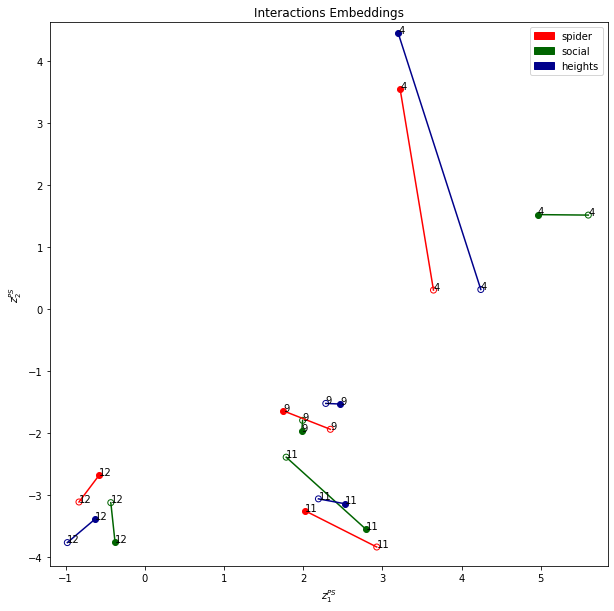

In [25]:
scatter_interactions_embedding(dtfa,labeler=interactions_labeler,filename='sound_interactions_embedding',plot_ellipse=False,colormap='tab20',figsize=(10,10))

In [26]:
import torch
import math
def unit_vector(a):
    return a/torch.norm(a)
def angle_between(a,b,radian=True):
    a_u = unit_vector(a)
    b_u = unit_vector(b)
    if radian:
        return torch.acos(torch.clamp(torch.dot(a_u,b_u),-1.0,1.0))
    else:
        return torch.acos(torch.clamp(torch.dot(a_u,b_u),-1.0,1.0))*(180/torch.Tensor([math.pi]))
def compute_low_high_angle(self,labeler=None):
    hyperparams = self.variational.hyperparams.state_vardict()
    z_s_mu = hyperparams['task']['mu'].data
    tasks = self.tasks()
    process_fears = ['spider','social','heights']
    map_task = {keys:torch.zeros([1,2]) for keys in process_fears}
    for process_fear in process_fears:
        flag_b = 0
        flag_a = 0
        for (i,t) in enumerate(tasks):
            if t == process_fear + '_high':
                b = z_s_mu[i,:]
                flag_b = 1
            elif t == process_fear + '_low':
                a = z_s_mu[i,:]
                flag_a = 1
        if flag_a and flag_b:
            map_task[process_fear] = b - a
    pairwise_angles = torch.zeros([3,3])
    for (i,p) in enumerate(process_fears):
        for (j,t) in enumerate(process_fears):
            angle = angle_between(map_task[p],map_task[t],radian=False)
            if angle > 180:
                angle = 360 - angle
            if i != j:
                pairwise_angles[i,j] = angle_between(map_task[p],map_task[t],radian=False)
    
    print (process_fears)
    return map_task , pairwise_angles

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_vectors(task_vectors,filename=None,unit_vectors=False,**kwargs):
    colors = ['r','b','g']
    legend = []
    for i,(key,value) in enumerate(task_vectors.items()):
        origin = [0], [0]
        if unit_vectors:
            value = unit_vector(value)
        qv = plt.quiver(*origin, value[0], value[1], color=colors[i],**kwargs)
        legend.append(mpatches.Patch(color=colors[i], label=key))
    plt.tick_params(
    axis='both',          
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False,
    left=False,
    labelleft=False) 
    plt.legend(handles=legend)
    if filename:
        plt.savefig(filename+'.pdf',dpi=300)
    plt.show()

In [28]:
task_vectors,pairwise_angles = compute_low_high_angle(dtfa,labeler=task_labeler)

KeyError: 'task'

In [ ]:
def plot_pairwise_angles(pairwise_angles,labels=['spider','social','heights'],filename=None):
    import numpy as np
    fig,ax = plt.subplots()
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.imshow(pairwise_angles, vmax=180, vmin=0 ,aspect='equal',cmap='OrRd')
    for (j, i), label in np.ndenumerate(np.round(pairwise_angles, 2)):
        ax.text(i, j, label, ha='center', va='center')
    if filename:
        plt.savefig(filename + '.pdf',dpi=300)
    plt.show()

In [ ]:
plot_pairwise_angles(pairwise_angles,filename='subject_' + str(SUBJECT_ID) + '_angles')

In [ ]:
plot_vectors(task_vectors,filename='subject_' + str(SUBJECT_ID) + '_unit_length',unit_vectors=True,scale=6,headwidth=2,headlength=3)

In [ ]:
plot_vectors(task_vectors,filename='subject_' + str(SUBJECT_ID) + '_vectors',unit_vectors=False,scale=10,headwidth=2,headlength=3)

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [ ]:
dtfa.average_reconstruction_error()

In [ ]:
dtfa.average_reconstruction_error(weighted=False)